### Johannes Best codes in the world 

In [1]:
# Importing modules 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#import data
features = pd.read_csv("C:/Users/johan/OneDrive/Copenhagen/CBS/3rd Semester/Applied ML/Assignment/AppliedML_Assignment/Assignment2/Data/Features data set.csv")
sales = pd.read_csv("C:/Users/johan/OneDrive/Copenhagen/CBS/3rd Semester/Applied ML/Assignment/AppliedML_Assignment/Assignment2/Data/sales data-set.csv")
stores = pd.read_csv("C:/Users/johan/OneDrive/Copenhagen/CBS/3rd Semester/Applied ML/Assignment/AppliedML_Assignment/Assignment2/Data/stores data-set.csv")

In [3]:
# Convert the date column to datetime format 
features["Date"] = pd.to_datetime(features["Date"], format="%d/%m/%Y")
sales["Date"] = pd.to_datetime(sales["Date"], format="%d/%m/%Y")

In [4]:
# Forwoard fill impution for 'CPI' and 'Unemployment'
features['CPI'].fillna(method='ffill', inplace=True)
features['Unemployment'].fillna(method='ffill', inplace=True)

In [5]:
features['Week'] = features.Date.dt.week

C:\Users\johan\AppData\Local\Temp\ipykernel_24424\2978714185.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  features['Week'] = features.Date.dt.week


In [6]:
# Imputing Markdown columns
# Impute NaN values based on weekly average
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_columns:
    weekly_avg = features.groupby('Week')[col].transform('mean')
    features[col].fillna(weekly_avg, inplace=True)

# can't impute all values for MarkDown2 , dropping Markdown2.

features.drop('MarkDown2', axis = 1, inplace=True)
features.drop('Week', axis=1, inplace=True)
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,24089.612333,198.031818,24865.942619,4185.380333,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,29880.900556,197.092500,20305.431829,5089.147556,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,12536.748111,59.385610,7038.310625,5646.276000,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,8504.312444,25.995714,2879.735679,4458.685000,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,11293.039000,22.353662,6312.144304,2911.005778,211.350143,8.106,False


In [10]:
# Encoding 'IsHoliday' & 'Type'
label_encoder = LabelEncoder()
features['IsHoliday'] = label_encoder.fit_transform(features['IsHoliday'])
sales['IsHoliday'] = label_encoder.fit_transform(sales['IsHoliday'])
stores['Type'] = label_encoder.fit_transform(stores['Type'])

In [11]:
# Merging the data
tmp_df = pd.merge(sales, features, on=['Store', 'Date', 'IsHoliday'], how='left')
df = pd.merge(stores, tmp_df, on=['Store'], how='left')
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,0,151315,1,2010-02-05,24924.50,0,42.31,2.572,24089.612333,198.031818,24865.942619,4185.380333,211.096358,8.106
1,1,0,151315,1,2010-02-12,46039.49,1,38.51,2.548,29880.900556,197.092500,20305.431829,5089.147556,211.242170,8.106
2,1,0,151315,1,2010-02-19,41595.55,0,39.93,2.514,12536.748111,59.385610,7038.310625,5646.276000,211.289143,8.106
3,1,0,151315,1,2010-02-26,19403.54,0,46.63,2.561,8504.312444,25.995714,2879.735679,4458.685000,211.319643,8.106
4,1,0,151315,1,2010-03-05,21827.90,0,46.50,2.625,11293.039000,22.353662,6312.144304,2911.005778,211.350143,8.106


In [12]:
df["Date"][421550:]

#2012-08-03

421550   2012-06-15
421551   2012-06-22
421552   2012-06-29
421553   2012-07-06
421554   2012-07-13
421555   2012-07-20
421556   2012-07-27
421557   2012-08-03
421558   2012-08-10
421559   2012-08-17
421560   2012-08-24
421561   2012-08-31
421562   2012-09-07
421563   2012-09-14
421564   2012-09-21
421565   2012-09-28
421566   2012-10-05
421567   2012-10-12
421568   2012-10-19
421569   2012-10-26
Name: Date, dtype: datetime64[ns]

In [13]:
aggregated_df = df.groupby(['Store', 'Date']).agg({
    'Type': 'mean',
    'Size': 'mean',
    'Dept': 'mean',
    'Weekly_Sales': 'sum',  # Sum the weekly sales for each store and week
    'IsHoliday': 'mean',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'MarkDown1': 'mean',
    'MarkDown3': 'mean',
    'MarkDown4': 'mean',
    'MarkDown5': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

In [14]:
aggregated_df.head()

,Store,Date,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,0.0,151315.0,43.616438,1643690.90,0.0,42.31,2.572,24089.612333,198.031818,24865.942619,4185.380333,211.096358,8.106
1,1,2010-02-12,0.0,151315.0,43.569444,1641957.44,1.0,38.51,2.548,29880.900556,197.092500,20305.431829,5089.147556,211.242170,8.106
2,1,2010-02-19,0.0,151315.0,43.616438,1611968.17,0.0,39.93,2.514,12536.748111,59.385610,7038.310625,5646.276000,211.289143,8.106
3,1,2010-02-26,0.0,151315.0,43.569444,1409727.59,0.0,46.63,2.561,8504.312444,25.995714,2879.735679,4458.685000,211.319643,8.106
4,1,2010-03-05,0.0,151315.0,44.041096,1554806.68,0.0,46.50,2.625,11293.039000,22.353662,6312.144304,2911.005778,211.350143,8.106


In [15]:
aggregated_df.drop("Dept", axis=1, inplace= True)

In [16]:
aggregated_df["Relative Sales"] = aggregated_df["Weekly_Sales"] / aggregated_df["Size"]

In [17]:
aggregated_df.head()

,Store,Date,Type,Size,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Relative Sales
0,1,2010-02-05,0.0,151315.0,1643690.90,0.0,42.31,2.572,24089.612333,198.031818,24865.942619,4185.380333,211.096358,8.106,10.862710
1,1,2010-02-12,0.0,151315.0,1641957.44,1.0,38.51,2.548,29880.900556,197.092500,20305.431829,5089.147556,211.242170,8.106,10.851254
2,1,2010-02-19,0.0,151315.0,1611968.17,0.0,39.93,2.514,12536.748111,59.385610,7038.310625,5646.276000,211.289143,8.106,10.653063
3,1,2010-02-26,0.0,151315.0,1409727.59,0.0,46.63,2.561,8504.312444,25.995714,2879.735679,4458.685000,211.319643,8.106,9.316509
4,1,2010-03-05,0.0,151315.0,1554806.68,0.0,46.50,2.625,11293.039000,22.353662,6312.144304,2911.005778,211.350143,8.106,10.275298


In [18]:
#find top 5 stores of last 3 months 
filtered_df = aggregated_df[(aggregated_df["Date"]>= "2012-08-03") &(aggregated_df["Date"]<="2012-10-26")]

#group by store and sum up relative sales
store_sales_sum = filtered_df.groupby('Store')['Relative Sales'].sum().reset_index()

# Sort the stores by the sum of "Relative Sales" in descending order and get the top 5 stores
top_5_stores = store_sales_sum.nlargest(5, 'Relative Sales')

In [19]:
filtered_df

,Store,Date,Type,Size,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Relative Sales
130,1,2012-08-03,0.0,151315.0,1631135.79,0.0,86.11,3.417,27584.78,30.23,12007.04,4661.71,221.949864,6.908,10.779736
131,1,2012-08-10,0.0,151315.0,1592409.97,0.0,85.05,3.494,11436.22,6.85,6964.26,4836.22,221.958433,6.908,10.523808
132,1,2012-08-17,0.0,151315.0,1597868.05,0.0,84.85,3.571,3662.06,4.84,2752.20,3446.15,222.038411,6.908,10.559879
133,1,2012-08-24,0.0,151315.0,1494122.38,0.0,77.66,3.620,6237.83,2.97,3463.03,7988.25,222.171946,6.908,9.874252
134,1,2012-08-31,0.0,151315.0,1582083.40,0.0,80.49,3.638,21442.73,21.70,13209.64,3032.96,222.305480,6.908,10.455562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,1.0,118221.0,713173.95,0.0,64.88,3.997,4556.61,1.50,1601.01,3288.25,192.013558,8.684,6.032549
6431,45,2012-10-05,1.0,118221.0,733455.07,0.0,64.89,3.985,5046.74,18.82,2253.43,2340.01,192.170412,8.667,6.204101
6432,45,2012-10-12,1.0,118221.0,734464.36,0.0,54.47,4.000,1956.28,7.89,599.32,3990.54,192.327265,8.667,6.212639
6433,45,2012-10-19,1.0,118221.0,718125.53,0.0,56.47,3.969,2004.02,3.18,437.73,1537.49,192.330854,8.667,6.074433


In [20]:
top_5_stores
#the 43, 42,10,37,23

,Store,Relative Sales
42,43,195.602390
41,42,183.043413
9,10,179.668021
36,37,171.359844
22,23,162.355635


In [21]:
store_sales_sum.sort_values(by="Relative Sales", ascending=False, inplace=True)

store_sales_sum

,Store,Relative Sales
42,43,195.602390
41,42,183.043413
9,10,179.668021
36,37,171.359844
22,23,162.355635
2,3,142.606465
37,38,141.380340
3,4,135.223843
0,1,133.929805
16,17,132.775059


In [24]:
top5 = [43, 42, 10, 37, 23]
top5_df = filtered_df[filtered_df["Store"].isin(top5)]
top5_df

,Store,Date,Type,Size,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Relative Sales
1417,10,2012-08-03,1.0,126512.0,1939440.09,0.0,84.76,3.595,37194.44,53.400000,21623.930000,2549.27,130.737871,7.170,15.330088
1418,10,2012-08-10,1.0,126512.0,1880436.94,0.0,90.78,3.811,15282.47,58.800000,5537.010000,14827.71,130.756161,7.170,14.863704
1419,10,2012-08-17,1.0,126512.0,1827797.40,0.0,88.83,4.002,4407.90,7.200000,3037.560000,3717.52,130.790968,7.170,14.447621
1420,10,2012-08-24,1.0,126512.0,1764984.15,0.0,82.50,4.055,11322.69,34.000000,6602.590000,7256.22,130.838161,7.170,13.951120
1421,10,2012-08-31,1.0,126512.0,1650285.54,0.0,86.97,3.886,26218.85,68.240000,12440.510000,3544.68,130.885355,7.170,13.044498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6144,43,2012-09-28,2.0,41062.0,577792.32,0.0,77.55,3.666,343.99,6.735758,1899.329737,1087.72,214.305250,9.285,14.071217
6145,43,2012-10-05,2.0,41062.0,642614.89,0.0,74.09,3.617,183.84,0.010000,3124.299474,3093.39,214.491267,8.839,15.649868
6146,43,2012-10-12,2.0,41062.0,619369.72,0.0,71.14,3.601,90.11,14.560000,639.365405,911.55,214.677283,8.839,15.083769
6147,43,2012-10-19,2.0,41062.0,623919.23,0.0,71.25,3.594,121.84,11.140000,507.965000,964.01,214.721249,8.839,15.194565


In [26]:
top5_df = top5_df.sort_values(by = ["Store", "Date"], ascending=[True, True])
top5_df

,Store,Date,Type,Size,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Relative Sales
1417,10,2012-08-03,1.0,126512.0,1939440.09,0.0,84.76,3.595,37194.44,53.400000,21623.930000,2549.27,130.737871,7.170,15.330088
1418,10,2012-08-10,1.0,126512.0,1880436.94,0.0,90.78,3.811,15282.47,58.800000,5537.010000,14827.71,130.756161,7.170,14.863704
1419,10,2012-08-17,1.0,126512.0,1827797.40,0.0,88.83,4.002,4407.90,7.200000,3037.560000,3717.52,130.790968,7.170,14.447621
1420,10,2012-08-24,1.0,126512.0,1764984.15,0.0,82.50,4.055,11322.69,34.000000,6602.590000,7256.22,130.838161,7.170,13.951120
1421,10,2012-08-31,1.0,126512.0,1650285.54,0.0,86.97,3.886,26218.85,68.240000,12440.510000,3544.68,130.885355,7.170,13.044498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6144,43,2012-09-28,2.0,41062.0,577792.32,0.0,77.55,3.666,343.99,6.735758,1899.329737,1087.72,214.305250,9.285,14.071217
6145,43,2012-10-05,2.0,41062.0,642614.89,0.0,74.09,3.617,183.84,0.010000,3124.299474,3093.39,214.491267,8.839,15.649868
6146,43,2012-10-12,2.0,41062.0,619369.72,0.0,71.14,3.601,90.11,14.560000,639.365405,911.55,214.677283,8.839,15.083769
6147,43,2012-10-19,2.0,41062.0,623919.23,0.0,71.25,3.594,121.84,11.140000,507.965000,964.01,214.721249,8.839,15.194565


C:\Users\johan\AppData\Local\Temp\ipykernel_24424\2660984252.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = top5_df.corr()


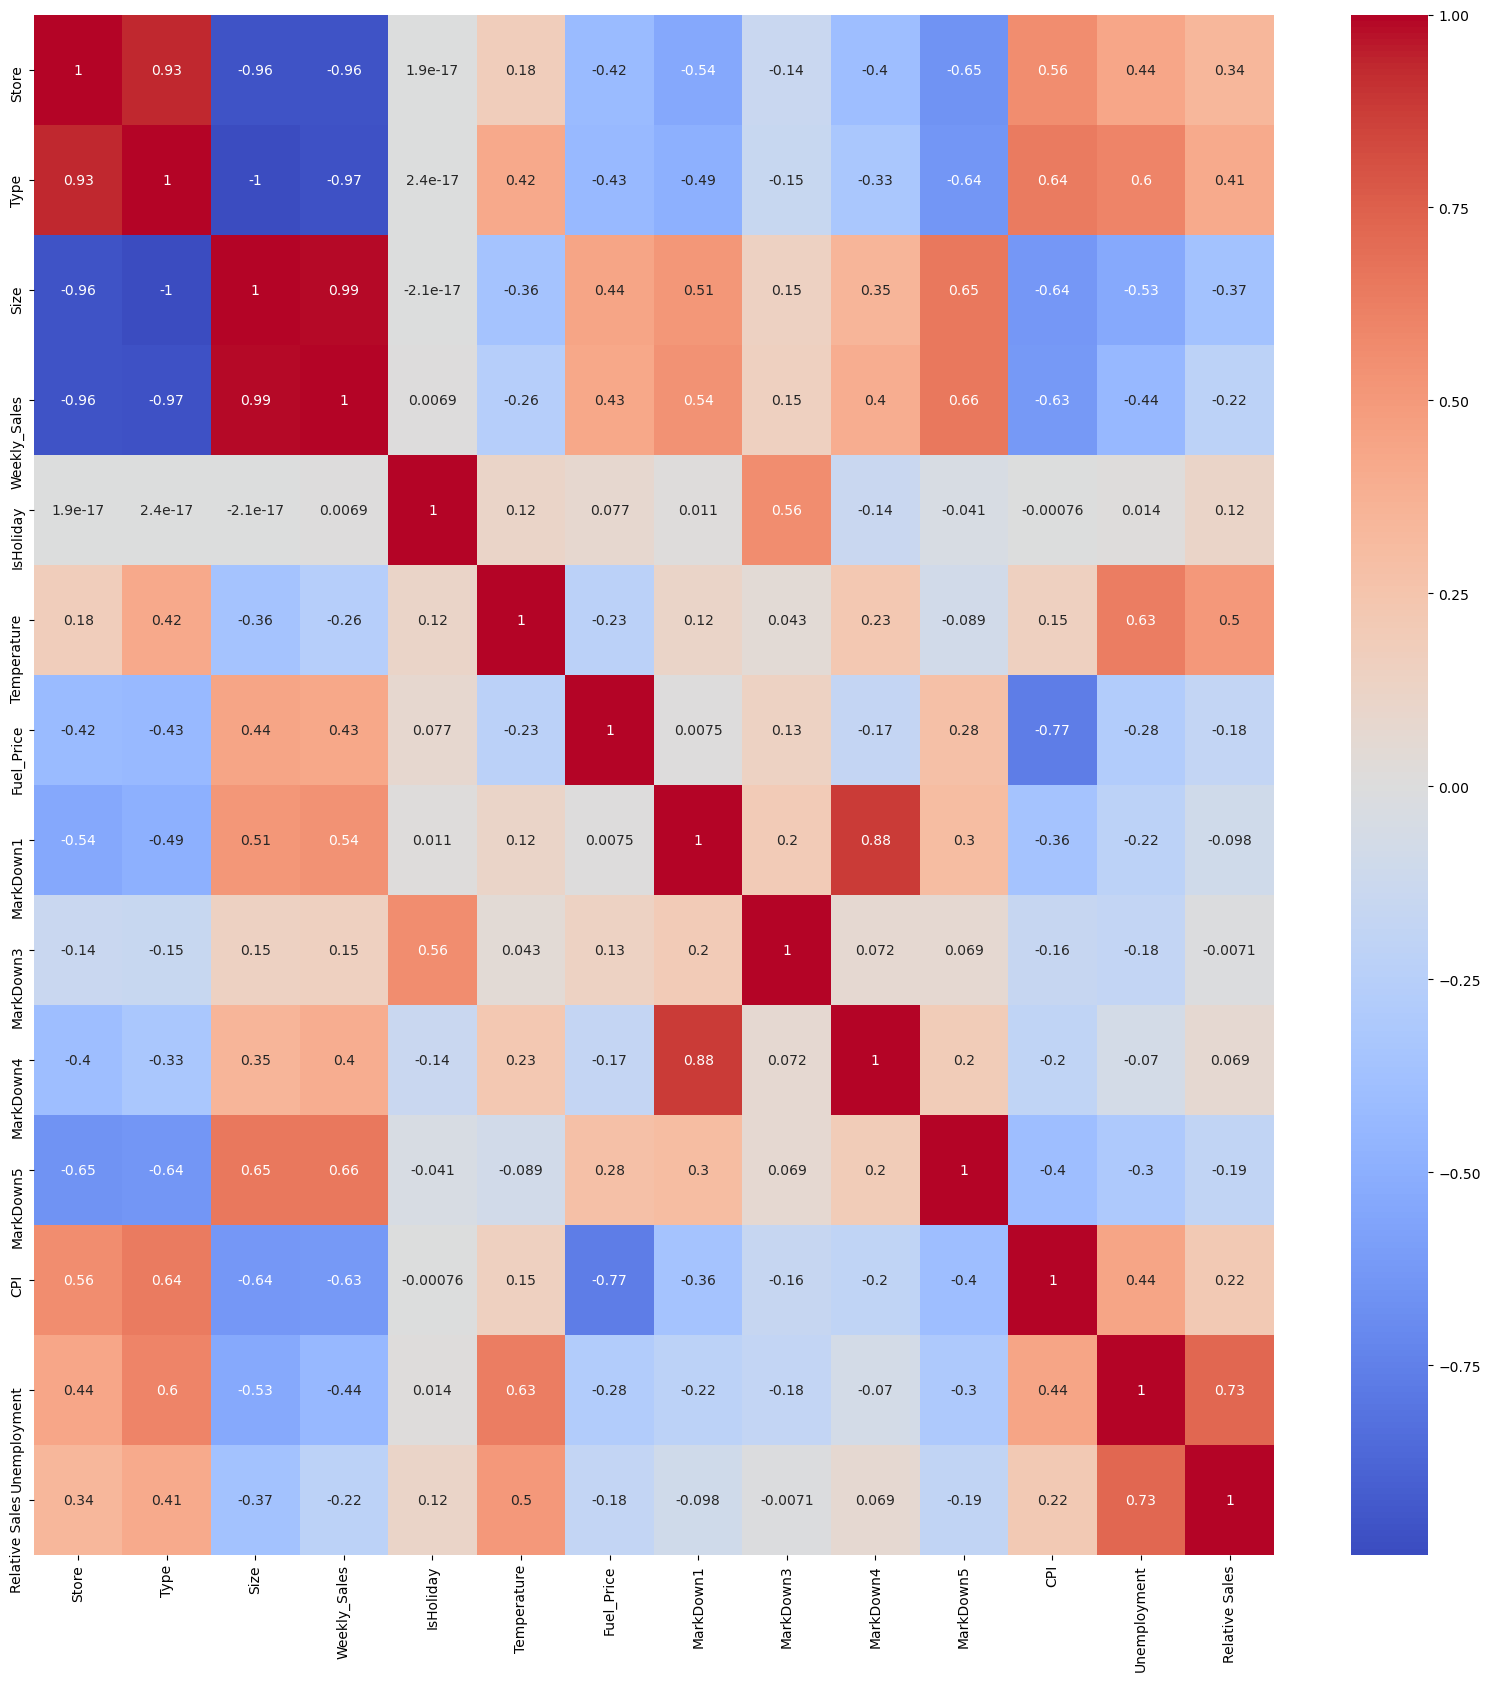

In [29]:
#correlation matrix for Top5

corr_matrix = top5_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 
plt.show()

In [ ]:
#linechart for top

In [ ]:
corr_matrix = store_df.corr()
corr_matrix["Churn"].sort_values(ascending=False)
decimal_places = 2
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=f'.{decimal_places}f', cmap='coolwarm') 
plt.show()

In [7]:
corr_matrix = store_df.corr()
corr_matrix

,Store,Type,Size
Store,1.000000,0.274598,-0.24427
Type,0.274598,1.000000,-0.78589
Size,-0.244270,-0.785890,1.00000


In [5]:
sales_df.info()
#date is not a datetime object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [3]:
sales_df["Date"] = pd.to_datetime(sales_df["Date"])

C:\Users\johan\AppData\Local\Temp\ipykernel_23388\163624348.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales_df["Date"] = pd.to_datetime(sales_df["Date"])


In [7]:
store_id = features_df["Store"].unique()
store_id

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [8]:
features_df.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
import pandas as pd

# Assuming features_df is your DataFrame
# First, filter the DataFrame to include only the relevant columns
selected_columns = ['Store', 'MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5' ]
filtered_df = features_df[selected_columns]

# Then, group the data by the 'store' column and count the null values in each group
null_counts = filtered_df.groupby('Store').apply(lambda group: group.isnull().sum(axis=0))

# Now, null_counts contains the count of null values in the specified columns for each store
print(null_counts)


       Store  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5
Store                                                              
1          0         92        109         93         92         92
2          0         92        107         93         92         92
3          0         92        113        104         95         92
4          0         92        107         94         94         92
5          0         92        116        106         98         92
6          0         92        107         94         92         92
7          0         92        116         96         92         92
8          0         92        109         95         94         92
9          0         92        119        105         98         92
10         0         92        114         96         92         92
11         0         92        106         94         94         92
12         0         92        110         98         92         92
13         0         92        107         93   

<Axes: >

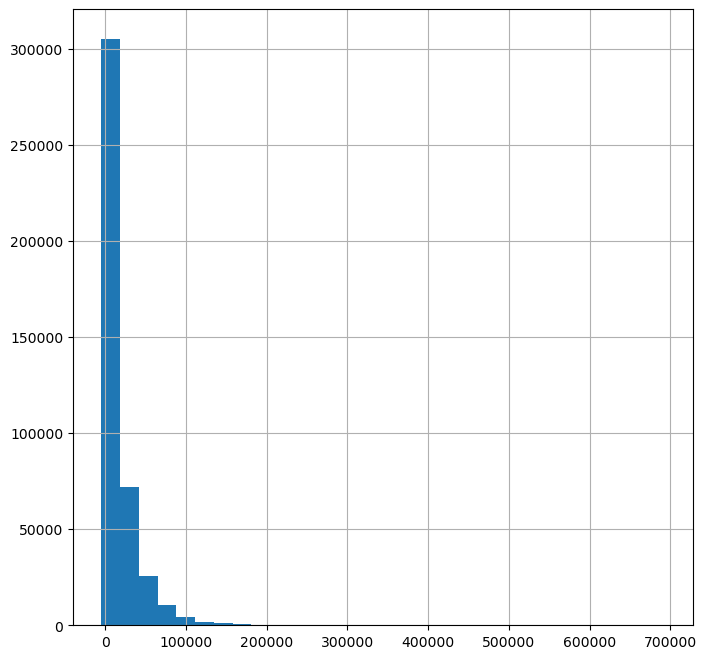

In [10]:
sales_df["Weekly_Sales"].hist(bins=30, figsize=(8,8))

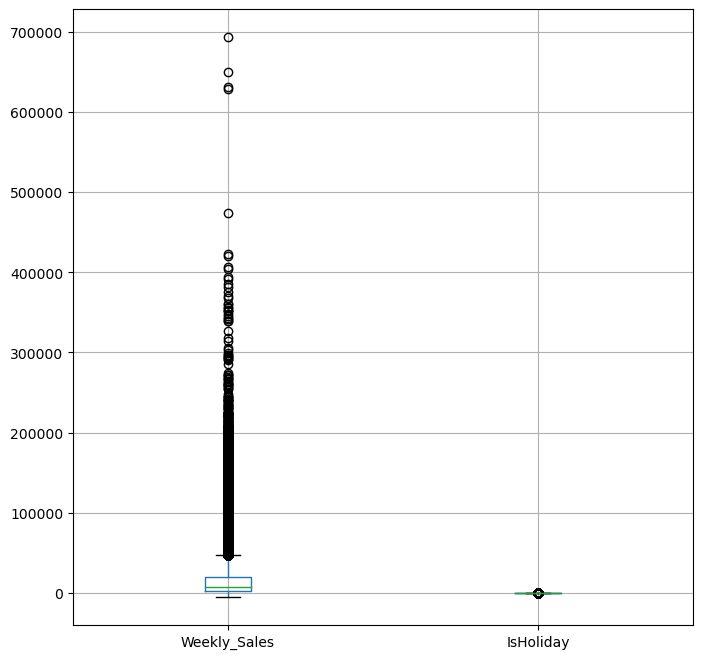

In [11]:
columns_to_include = sales_df.columns[2:]
sales_df[columns_to_include].boxplot(figsize=(8,8))
plt.show()

In [12]:
sales_df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [13]:
for x in ['Weekly_Sales']:
    q75,q25 = np.percentile(sales_df.loc[:,x],[75,25])
    intr_qr = q75-q25

intr_qr
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
    
 #data points that lie outside of the lower and the upper bound with a NULL value.
sales_df.loc[sales_df[x] < min,x] = np.nan
sales_df.loc[sales_df[x] > max,x] = np.nan

In [14]:
# Assuming features_df is your DataFrame
# First, filter the DataFrame to include only the relevant columns
selected_columns = ["Store",'Weekly_Sales']
filtered_df = sales_df[selected_columns]

# Then, group the data by the 'store' column and count the null values in each group
null_counts = sales_df.groupby('Store').apply(lambda group: group.isnull().sum(axis=0))

# Now, null_counts contains the count of null values in the specified columns for each store
print(null_counts)

       Store  Dept  Date  Weekly_Sales  IsHoliday
Store                                            
1          0     0     0          1337          0
2          0     0     0          1779          0
3          0     0     0           147          0
4          0     0     0          2224          0
5          0     0     0           123          0
6          0     0     0          1340          0
7          0     0     0            90          0
8          0     0     0           458          0
9          0     0     0           161          0
10         0     0     0          2030          0
11         0     0     0          1022          0
12         0     0     0           584          0
13         0     0     0          1933          0
14         0     0     0          1997          0
15         0     0     0           175          0
16         0     0     0           147          0
17         0     0     0           518          0
18         0     0     0           799          0


Based on outlier, we might focus onlu on store 7, 29, 33, 44 as they have the fewest outliers
check for weekly sales for these stores

In [15]:
def show_sales(df, storeNo):
    store_df = df[df["Store"]==storeNo]
    store_df = store_df.sort_values(by="Date")

    plt.figure(figsize=(24, 12))  # Set the figure size
    plt.plot(store_df['Date'], store_df['Weekly_Sales'], marker='o', linestyle='-', color='b')
    plt.show()
    uniqueDept = store_df["Dept"].unique()
    print(np.sort(uniqueDept))
    return store_df

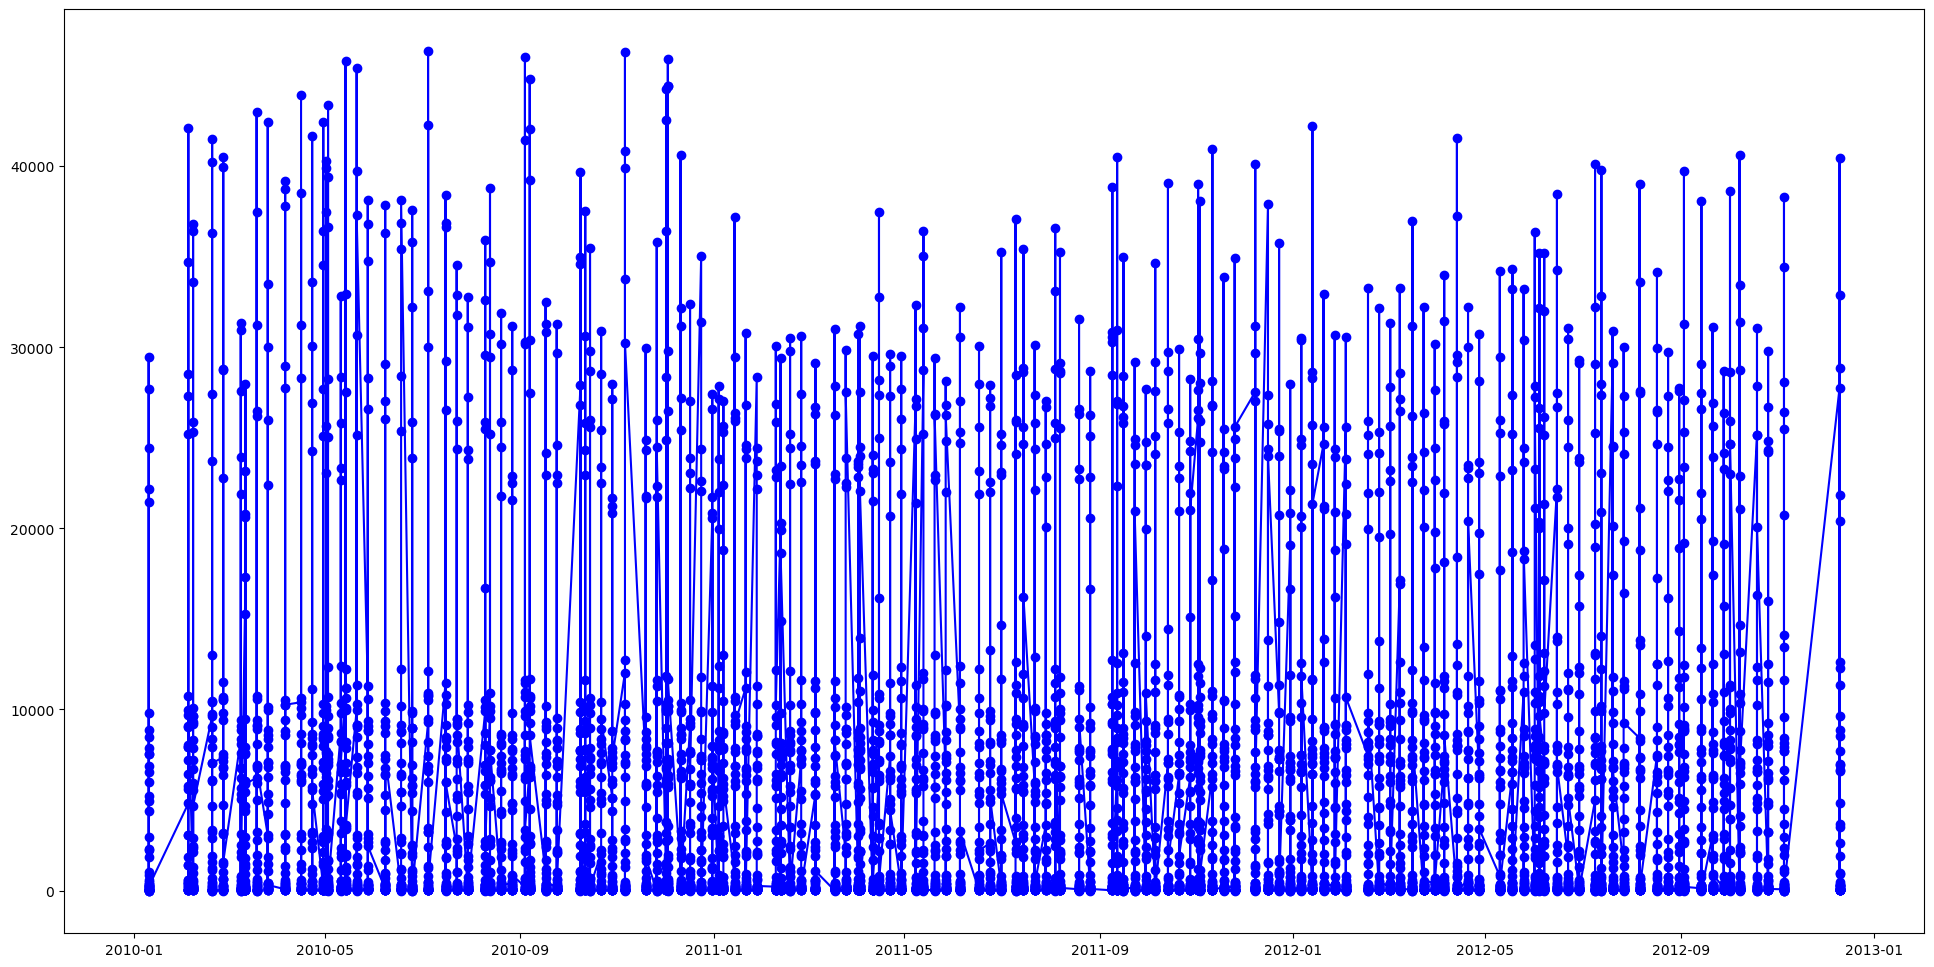

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 20 21 22 23 24 25 26
 27 31 32 33 34 35 36 38 40 41 42 44 46 49 52 55 56 59 60 67 71 72 74 79
 80 81 82 83 87 90 91 92 93 94 95 96 97 98 99]


,Store,Dept,Date,Weekly_Sales,IsHoliday
314822,33,7,2010-01-10,249.73,False
319849,33,94,2010-01-10,29446.05,False
315223,33,10,2010-01-10,40.01,False
314082,33,1,2010-01-10,1019.69,False
316784,33,26,2010-01-10,75.75,False
...,...,...,...,...,...
315889,33,14,2012-12-10,925.94,False
316537,33,21,2012-12-10,92.84,False
319669,33,92,2012-12-10,40430.07,False
319812,33,93,2012-12-10,21829.15,False


In [17]:
show_sales(sales_df, 33)

one store as multiple departments

Get total store weekly sales

In [21]:
def total_store_weekly_sales(df, storeNo):
    store_df = df[df["Store"]==storeNo]
    store_df = store_df.sort_values(by="Date")
    weekly_total_sales = store_df.groupby("Date")["Weekly_Sales"].sum().reset_index()
    
    plt.figure(figsize=(24,12))
    plt.plot(weekly_total_sales["Date"], weekly_total_sales["Weekly_Sales"], marker = "o", linestyle= "-", color = "b")
    plt.title("Total Weekly Store Sales")
    plt.xlabel("Date")
    plt.ylabel("Total Store Sales")
    plt.grid(True)
    plt.show()

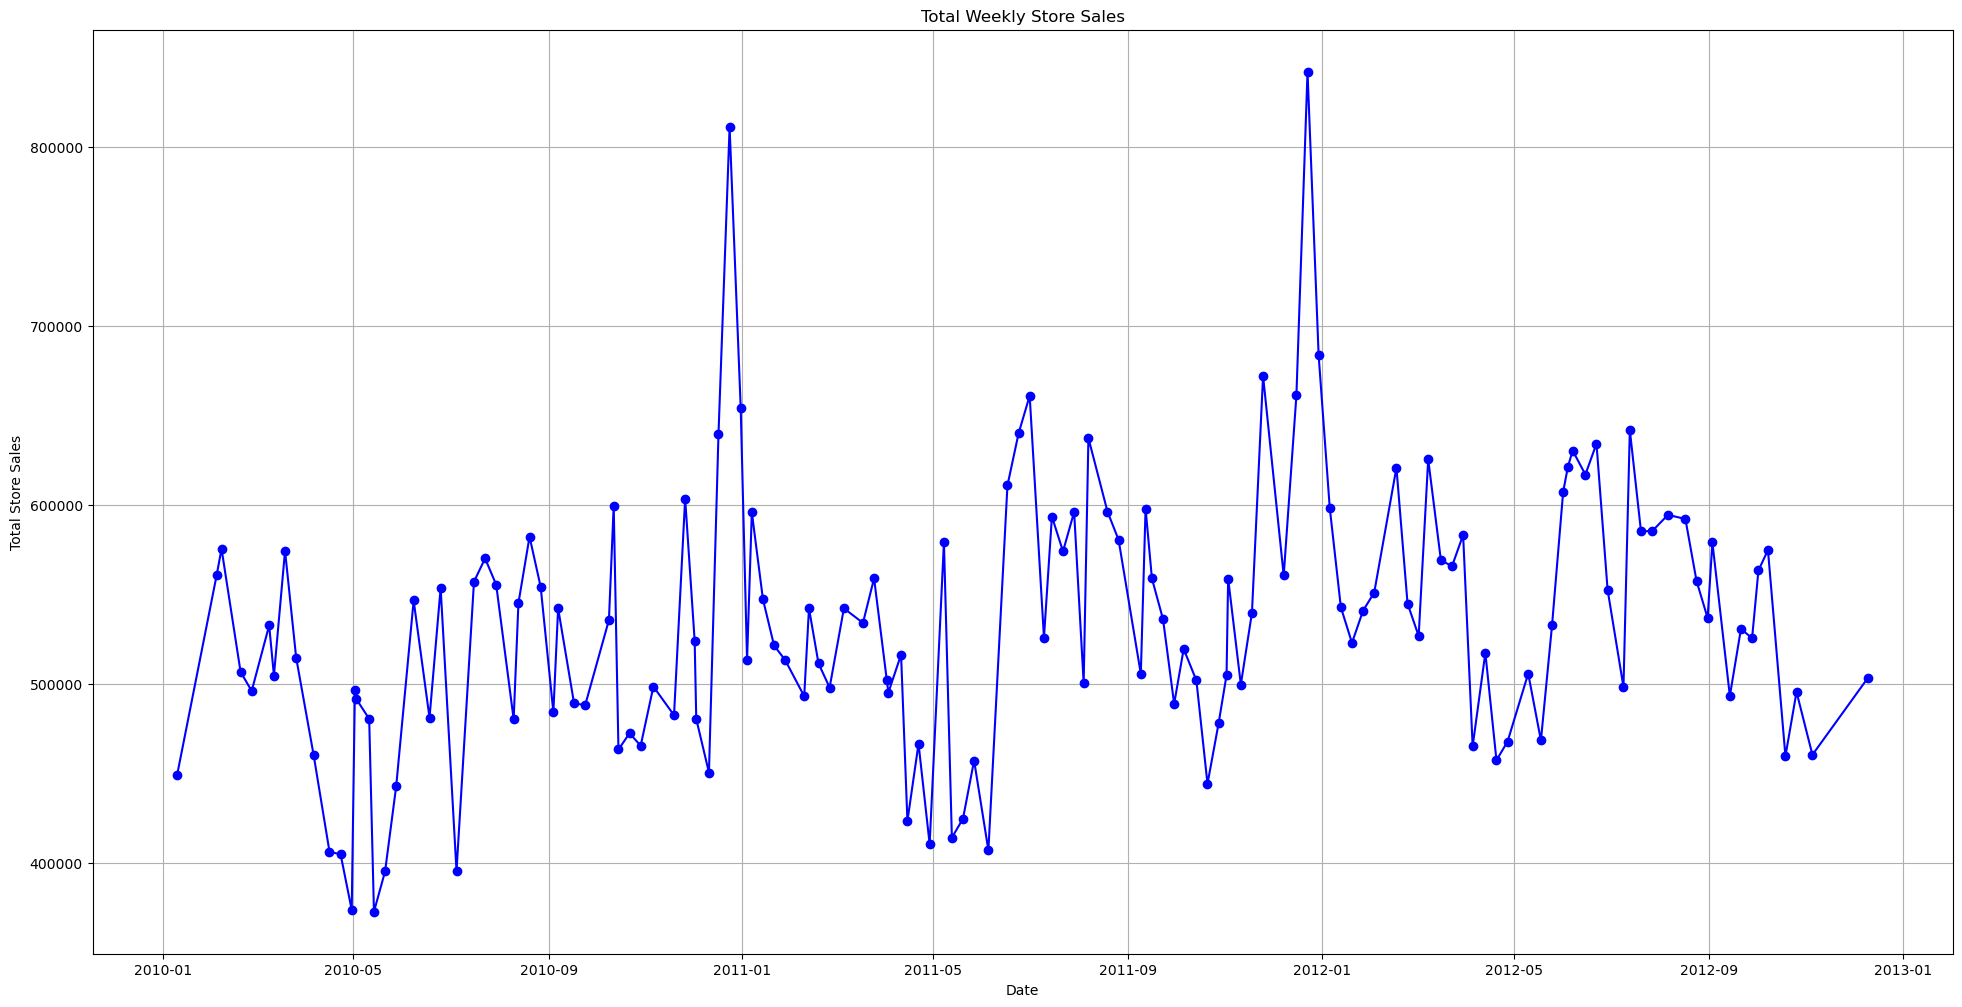

In [22]:
total_store_weekly_sales(sales_df, 7)

In [4]:
def totalsales(df):
    df = df.sort_values(by="Date")
    weekly_total_sales = df.groupby("Date")["Weekly_Sales"].sum().reset_index()
    
    plt.figure(figsize=(24,12))
    plt.plot(weekly_total_sales["Date"], weekly_total_sales["Weekly_Sales"], marker = "o", linestyle= "-", color = "b")
    plt.title("Total Weekly Sales")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.grid(True)
    plt.show()

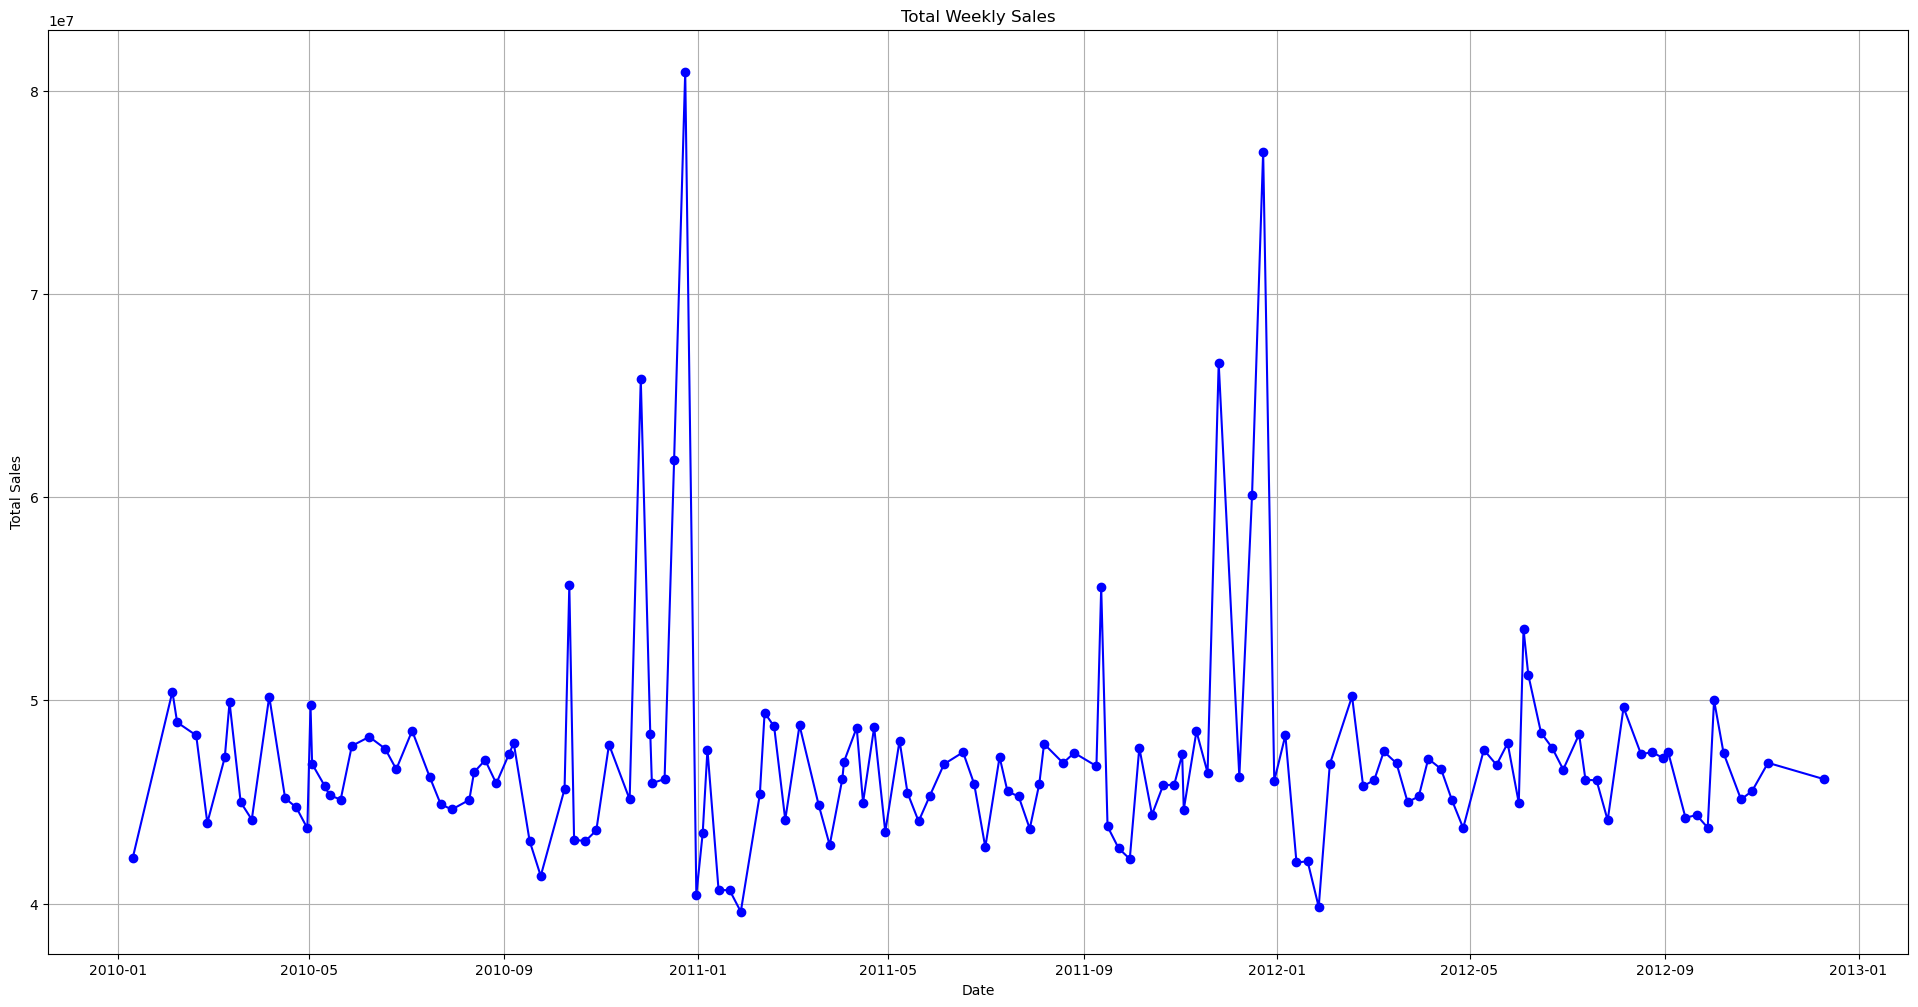

In [5]:
totalsales(sales_df)